Module 1A

In [1]:

import numpy as np

# Define the AND gate inputs and expected outputs
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)     # Single bias
learning_rate = 0.1          # Learning rate

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(100):  # Train for 100 epochs
    total_error = 0
    for i in range(len(inputs)):
        input_vector = inputs[i]
        expected_output = expected_outputs[i]

        # Compute the perceptron's output
        weighted_sum = np.dot(input_vector, weights) + bias
        output = step_function(weighted_sum)

        # Compute the error
        error = expected_output - output
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_vector
        bias += learning_rate * error

    # Print progress
    if total_error == 0:
        print(f"Training complete after {epoch + 1} epochs.")
        break
else:
    print("Training did not converge.")

# Test the perceptron
print("\nTesting the perceptron:")
for i in range(len(inputs)):
    input_vector = inputs[i]
    weighted_sum = np.dot(input_vector, weights) + bias
    output = step_function(weighted_sum)
    print(f"Input: {input_vector}, Output: {output}")


Training complete after 6 epochs.

Testing the perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


In [2]:
import numpy as np

# Define the OR gate inputs and expected outputs
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 1, 1, 1])  # OR gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)     # Single bias
learning_rate = 0.1          # Learning rate

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(100):  # Train for 100 epochs
    total_error = 0
    for i in range(len(inputs)):
        input_vector = inputs[i]
        expected_output = expected_outputs[i]

        # Compute the perceptron's output
        weighted_sum = np.dot(input_vector, weights) + bias
        output = step_function(weighted_sum)

        # Compute the error
        error = expected_output - output
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_vector
        bias += learning_rate * error

    # Print progress
    if total_error == 0:
        print(f"Training complete after {epoch + 1} epochs.")
        break
else:
    print("Training did not converge.")

# Test the perceptron
print("\nTesting the perceptron:")
for i in range(len(inputs)):
    input_vector = inputs[i]
    weighted_sum = np.dot(input_vector, weights) + bias
    output = step_function(weighted_sum)
    print(f"Input: {input_vector}, Output: {output}")


Training complete after 3 epochs.

Testing the perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


Module 1B

Training did not converge.

Testing accuracy: 98.51%


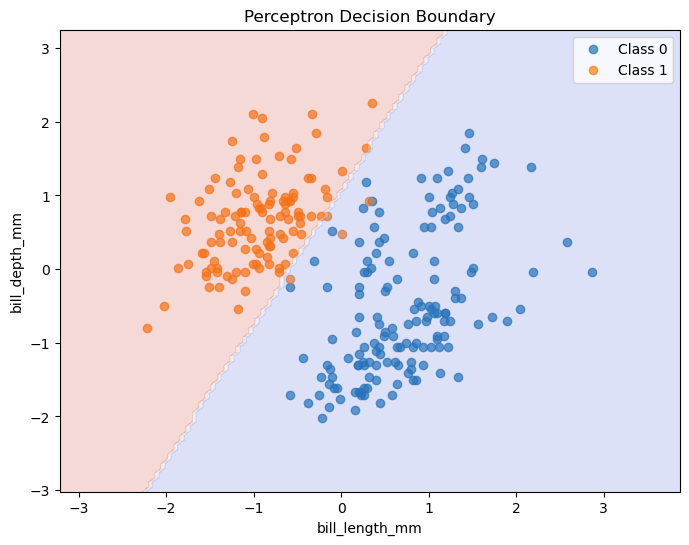

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'penguins.csv'
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna()

# Define features and target
features = ['bill_length_mm', 'bill_depth_mm']  # Choose numeric columns
target = 'species'  # Classify based on species

# Convert target to binary values (e.g., Adelie = 1, others = 0)
df[target] = (df[target] == 'Adelie').astype(int)

X = df[features].values
y = df[target].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
weights = np.random.rand(X_train.shape[1])
bias = np.random.rand(1)
learning_rate = 0.1

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(100):  # Train for 100 epochs
    total_error = 0
    for i in range(len(X_train)):
        input_vector = X_train[i]
        expected_output = y_train[i]

        # Compute the perceptron's output
        weighted_sum = np.dot(input_vector, weights) + bias
        output = step_function(weighted_sum)

        # Compute the error
        error = expected_output - output
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_vector
        bias += learning_rate * error

    # Stop training if no errors
    if total_error == 0:
        print(f"Training complete after {epoch + 1} epochs.")
        break
else:
    print("Training did not converge.")

# Test the perceptron
correct_predictions = 0
for i in range(len(X_test)):
    input_vector = X_test[i]
    weighted_sum = np.dot(input_vector, weights) + bias
    output = step_function(weighted_sum)
    if output == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f"\nTesting accuracy: {accuracy * 100:.2f}%")

# Visualization
plt.figure(figsize=(8, 6))

# Plot data points
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], 
                label=f"Class {label}", alpha=0.7)

# Decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))

Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = np.array([step_function(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()


Training AND gate:
AND gate predictions: [0 0 0 1]


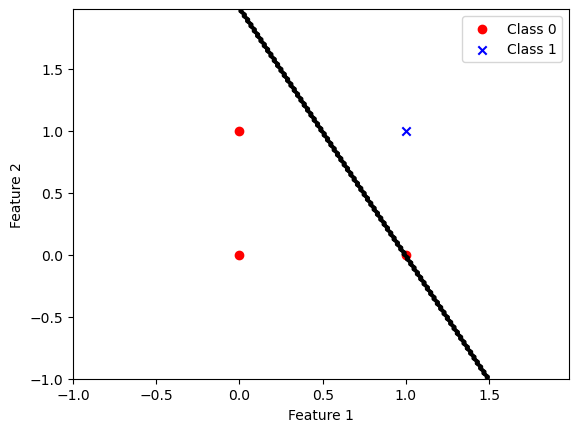


Training OR gate:
OR gate predictions: [0 1 1 1]


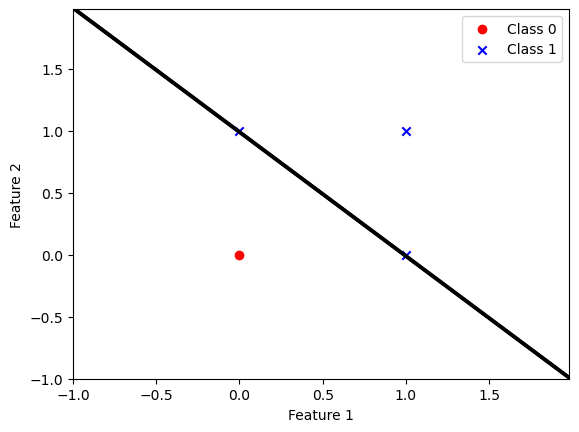


Training on custom dataset:
Accuracy: 1.0


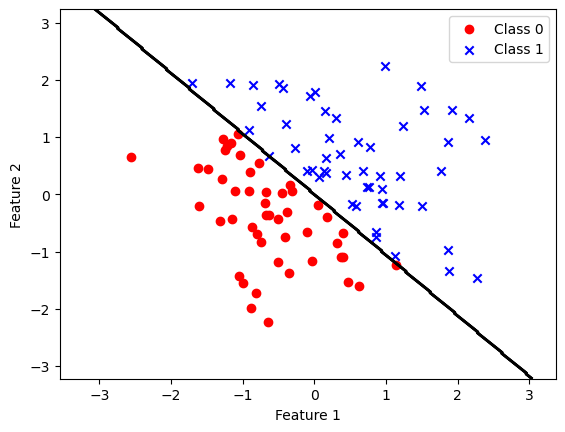

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        """Train the perceptron on input data.
        
        Parameters:
        X : array-like, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples]
        """
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.predict_one(xi)
                
                # Update weights and bias if prediction is wrong
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors_.append(errors)
            # Stop if the perceptron has converged
            if errors == 0:
                break

    def predict_one(self, X):
        """Predict class for a single sample"""
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        """Predict class labels for multiple samples"""
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        """Plot the decision boundary and data points"""
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        # Plot decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Example usage for logical gates
def demonstrate_logical_gates():
    # Training data for AND gate
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    
    # Training data for OR gate
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    
    # Train AND gate
    print("Training AND gate:")
    p_and = Perceptron(learning_rate=0.1, n_iterations=100)
    p_and.fit(X_and, y_and)
    print("AND gate predictions:", p_and.predict(X_and))
    p_and.plot_decision_boundary(X_and, y_and)
    
    # Train OR gate
    print("\nTraining OR gate:")
    p_or = Perceptron(learning_rate=0.1, n_iterations=100)
    p_or.fit(X_or, y_or)
    print("OR gate predictions:", p_or.predict(X_or))
    p_or.plot_decision_boundary(X_or, y_or)

# Example usage for custom dataset
def demonstrate_custom_dataset():
    # Generate a simple linearly separable dataset
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)
    
    # Train perceptron
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)
    
    # Plot results
    print("\nTraining on custom dataset:")
    print("Accuracy:", np.mean(p.predict(X) == y))
    p.plot_decision_boundary(X, y)

if __name__ == "__main__":
    demonstrate_logical_gates()
    demonstrate_custom_dataset()

OR Gate Predictions: [0 1 1 1]


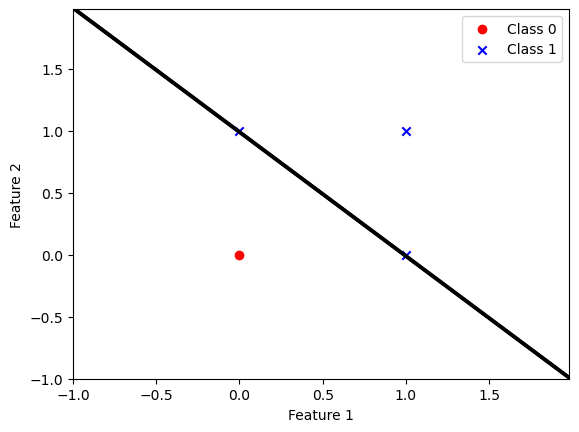

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# OR Gate Example
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

p_or = Perceptron(learning_rate=0.1, n_iterations=100)
p_or.fit(X_or, y_or)
print("OR Gate Predictions:", p_or.predict(X_or))
p_or.plot_decision_boundary(X_or, y_or)


AND Gate Predictions: [0 0 0 1]


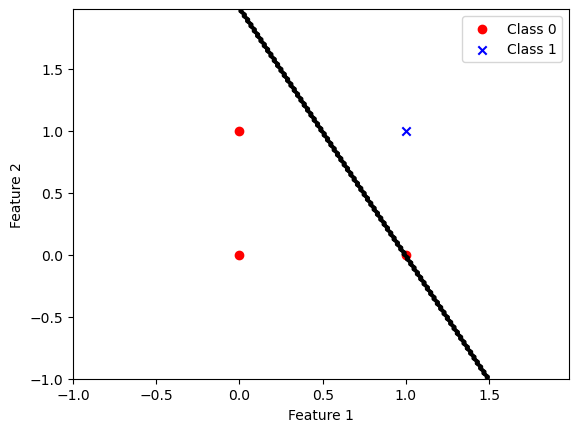

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# AND Gate Example
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

p_and = Perceptron(learning_rate=0.1, n_iterations=100)
p_and.fit(X_and, y_and)
print("AND Gate Predictions:", p_and.predict(X_and))
p_and.plot_decision_boundary(X_and, y_and)


Binary Classification Accuracy: 1.0


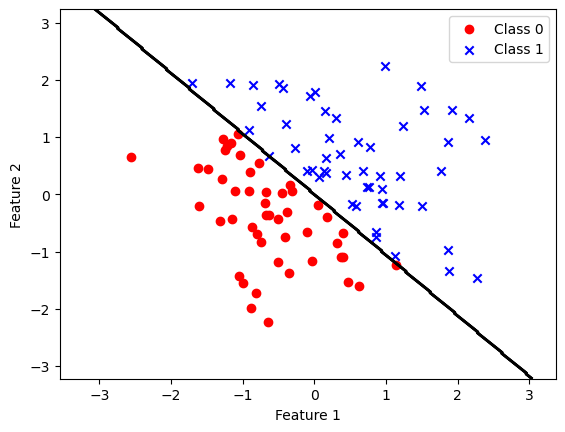

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Custom Binary Classification Example
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

p = Perceptron(learning_rate=0.1, n_iterations=100)
p.fit(X, y)

print("Binary Classification Accuracy:", np.mean(p.predict(X) == y))
p.plot_decision_boundary(X, y)


Accuracy: 97.67%


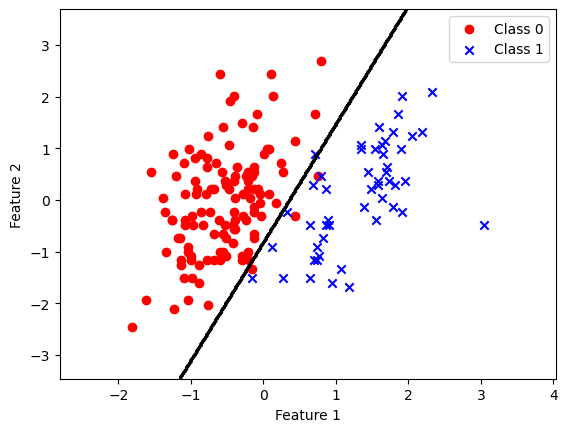

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Load the penguin dataset (replace this path with the actual file path)
df = pd.read_csv('penguins.csv')

# Data Preprocessing
# Drop rows with missing values
df.dropna(inplace=True)

# Convert the species column to numerical labels (binary classification)
# Let's assume we're classifying "Adelie" vs "Chinstrap" penguins (you can modify this based on your dataset)
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})  # Change if needed

# Select relevant features for binary classification (e.g., bill length and bill depth)
X = df[['bill_length_mm', 'bill_depth_mm']].values
y = df['species'].values

# Filter out Gentoo species if needed (for binary classification)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron model
p = Perceptron(learning_rate=0.1, n_iterations=100)
p.fit(X_train, y_train)

# Make predictions
y_pred = p.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary
p.plot_decision_boundary(X_train, y_train)


Accuracy: 94.03%


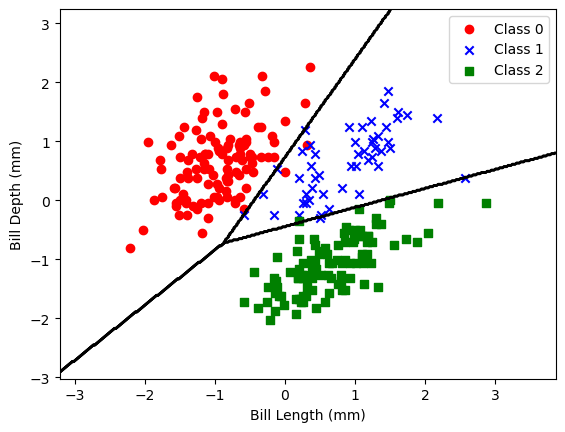

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        n_classes = len(np.unique(y))  # Number of classes
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights[target] += self.learning_rate * xi
                    self.bias[target] += self.learning_rate
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activations = np.dot(self.weights, X) + self.bias
        return np.argmax(activations)  # Return the class with the highest activation

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', marker='s', label='Class 2')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Bill Length (mm)')
        plt.ylabel('Bill Depth (mm)')
        plt.legend()
        plt.show()

# Load the penguin dataset (replace with the actual path to your file)
df = pd.read_csv('penguins.csv')

# Data Preprocessing
df.dropna(inplace=True)

# Convert the species column to numerical labels (multiclass)
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Select only two features for classification
X = df[['bill_length_mm', 'bill_depth_mm']].values  # Use only two features
y = df['species'].values

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron model
p = Perceptron(learning_rate=0.1, n_iterations=100)
p.fit(X_train, y_train)

# Make predictions
y_pred = p.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary
p.plot_decision_boundary(X_train, y_train)


Accuracy: 100.00%


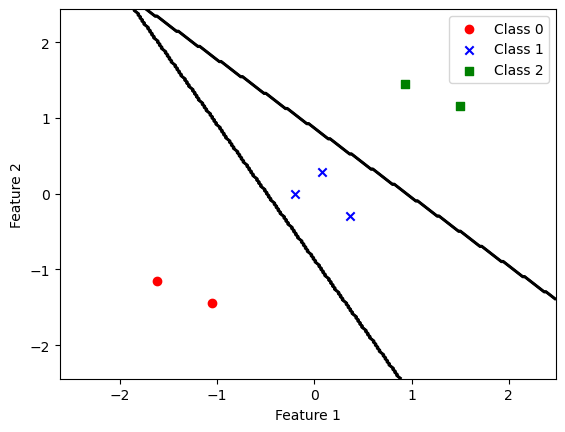

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        n_classes = len(np.unique(y))  # Number of classes
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict_one(xi)
                error = target - prediction
                if error != 0:
                    self.weights[target] += self.learning_rate * xi
                    self.bias[target] += self.learning_rate
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activations = np.dot(self.weights, X) + self.bias
        return np.argmax(activations)  # Return the class with the highest activation

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', marker='s', label='Class 2')
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Load custom dataset (ensure the file path is correct)
# df = pd.read_csv('custom_dataset.csv')

# Example of custom data: 3 classes
X = np.array([[1, 2], [2, 3], [3, 1], [6, 6], [7, 7], [8, 5], [10, 11], [11, 12], [12, 10]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron model
p = Perceptron(learning_rate=0.1, n_iterations=100)
p.fit(X_train, y_train)

# Make predictions
y_pred = p.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary (optional)
p.plot_decision_boundary(X_train, y_train)


Module 1C

MLP XOR Gate Predictions: [False  True  True False]


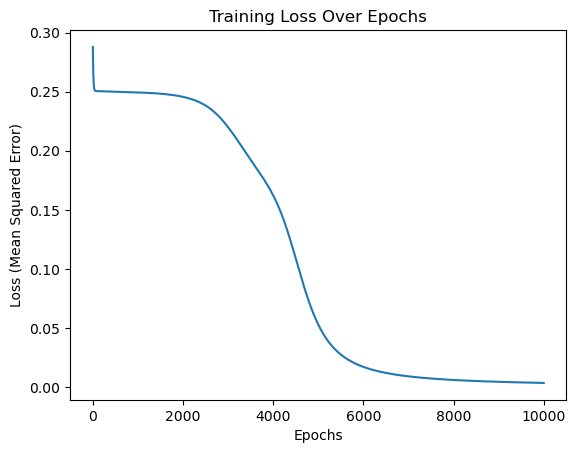

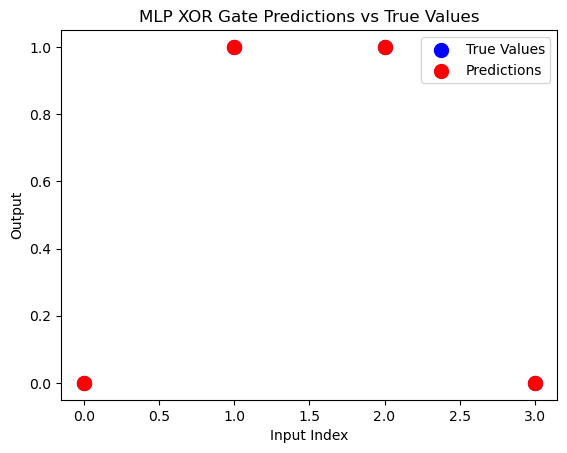

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# XOR Gate Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# MLP implementation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Train MLP
def train_mlp(X, y, lr=0.1, epochs=10000):
    np.random.seed(42)
    
    # Initialize weights
    input_dim, hidden_dim, output_dim = 2, 2, 1
    weights_input_hidden = np.random.rand(input_dim, hidden_dim)
    weights_hidden_output = np.random.rand(hidden_dim, output_dim)
    bias_hidden = np.random.rand(hidden_dim)
    bias_output = np.random.rand(output_dim)
    
    # Track the error for plotting
    loss_history = []
    
    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        output = sigmoid(output_layer_input)
        
        # Backward pass
        output_error = y.reshape(-1, 1) - output
        output_delta = output_error * sigmoid_derivative(output)
        
        hidden_error = np.dot(output_delta, weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
        
        # Update weights and biases
        weights_hidden_output += lr * np.dot(hidden_layer_output.T, output_delta)
        bias_output += lr * output_delta.sum(axis=0)
        
        weights_input_hidden += lr * np.dot(X.T, hidden_delta)
        bias_hidden += lr * hidden_delta.sum(axis=0)
        
        # Track the loss for plotting
        loss = np.mean(output_error ** 2)  # Mean Squared Error (MSE)
        loss_history.append(loss)
        
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, loss_history

# Train the MLP
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, loss_history = train_mlp(X, y)

# Predict
def predict_mlp(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    return sigmoid(output_layer_input) > 0.5

predictions = predict_mlp(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)

# Print predictions
print("MLP XOR Gate Predictions:", predictions.flatten())

# Plotting the loss curve
plt.plot(loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.show()

# Plotting the predictions vs true values
plt.scatter([0, 1, 2, 3], y, color='blue', label='True Values', s=100)
plt.scatter([0, 1, 2, 3], predictions.flatten(), color='red', label='Predictions', s=100)
plt.title('MLP XOR Gate Predictions vs True Values')
plt.xlabel('Input Index')
plt.ylabel('Output')
plt.legend()
plt.show()


Module 1D

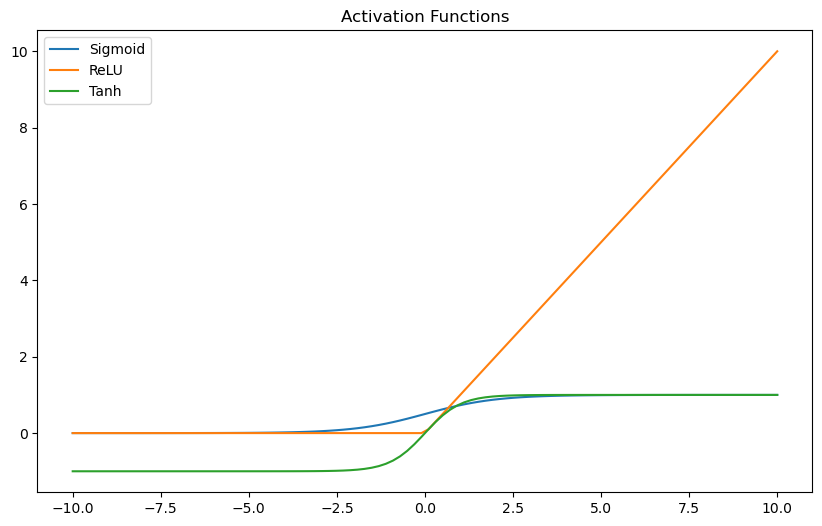

In [2]:
import matplotlib.pyplot as plt

# Activation Functions
x = np.linspace(-10, 10, 100)

sigmoid_output = sigmoid(x)
relu_output = np.maximum(0, x)
tanh_output = np.tanh(x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_output, label='Sigmoid')
plt.plot(x, relu_output, label='ReLU')
plt.plot(x, tanh_output, label='Tanh')
plt.title("Activation Functions")
plt.legend()
plt.show()


Module 1E

In [3]:
import numpy as np

# Define sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define forward and backward propagation function
def forward_backward(X, y, lr=0.1, epochs=10000):
    np.random.seed(42)
    input_dim, hidden_dim, output_dim = 2, 2, 1
    
    # Initialize weights and biases
    weights_input_hidden = np.random.rand(input_dim, hidden_dim)
    weights_hidden_output = np.random.rand(hidden_dim, output_dim)
    bias_hidden = np.random.rand(hidden_dim)
    bias_output = np.random.rand(output_dim)
    
    for epoch in range(epochs):
        # Forward Pass
        hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_output = sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)
        
        # Backward Pass
        output_error = y.reshape(-1, 1) - final_output
        output_delta = output_error * sigmoid_derivative(final_output)
        
        hidden_error = np.dot(output_delta, weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
        
        # Update weights and biases
        weights_hidden_output += lr * np.dot(hidden_output.T, output_delta)
        bias_output += lr * output_delta.sum(axis=0)
        
        weights_input_hidden += lr * np.dot(X.T, hidden_delta)
        bias_hidden += lr * hidden_delta.sum(axis=0)
        
        # Print the output after every 1000 epochs for monitoring
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Output: {final_output.flatten()}")
    
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, final_output

# XOR Gate Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train the neural network
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, final_output = forward_backward(X, y)

# Output the final predictions
print("\nFinal Output (Predictions):")
print(final_output.flatten())

# Output final weights and biases for further inspection
print("\nFinal Weights and Biases:")
print("Weights Input to Hidden:\n", weights_input_hidden)
print("Weights Hidden to Output:\n", weights_hidden_output)
print("Bias Hidden:\n", bias_hidden)
print("Bias Output:\n", bias_output)


Epoch 0, Output: [0.68808925 0.69744107 0.69633921 0.7033354 ]
Epoch 1000, Output: [0.49953088 0.5015154  0.50568475 0.50533912]
Epoch 2000, Output: [0.48110889 0.50477956 0.514228   0.51963256]
Epoch 3000, Output: [0.38534545 0.53777435 0.56002217 0.56932022]
Epoch 4000, Output: [0.23051865 0.60338735 0.65064424 0.56241185]
Epoch 5000, Output: [0.17995261 0.77630772 0.77622408 0.27989045]
Epoch 6000, Output: [0.1212434  0.87390964 0.87359195 0.14534893]
Epoch 7000, Output: [0.09311731 0.90890139 0.90868781 0.10180096]
Epoch 8000, Output: [0.07746638 0.92645479 0.92629588 0.08084522]
Epoch 9000, Output: [0.06739362 0.93716493 0.93703844 0.0683583 ]

Final Output (Predictions):
[0.06029012 0.94447222 0.944367   0.05997169]

Final Weights and Biases:
Weights Input to Hidden:
 [[3.6991303  5.699086  ]
 [3.70579679 5.73069504]]
Weights Hidden to Output:
 [[-8.02663537]
 [ 7.42116082]]
Bias Hidden:
 [-5.67051588 -2.37581163]
Bias Output:
 [-3.35000977]
